# 7.6. Estimating a probability distribution nonparametrically with a kernel density estimation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
# www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'Allstorms.ibtracs_wmo.v03r05.csv?'
                 'raw=true')

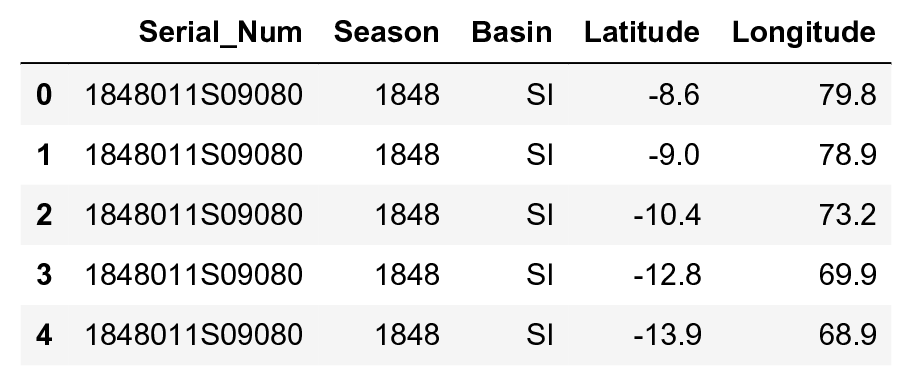

In [3]:
df[df.columns[[0, 1, 3, 8, 9]]].head()

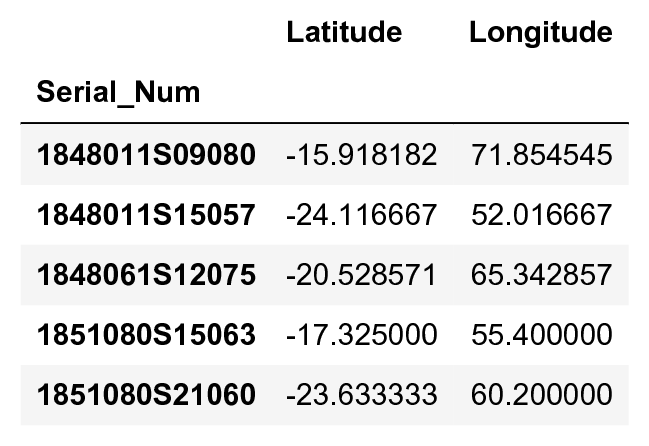

In [4]:
dfs = df.groupby('Serial_Num')
pos = dfs[['Latitude', 'Longitude']].mean()
x = pos.Longitude.values
y = pos.Latitude.values
pos.head()

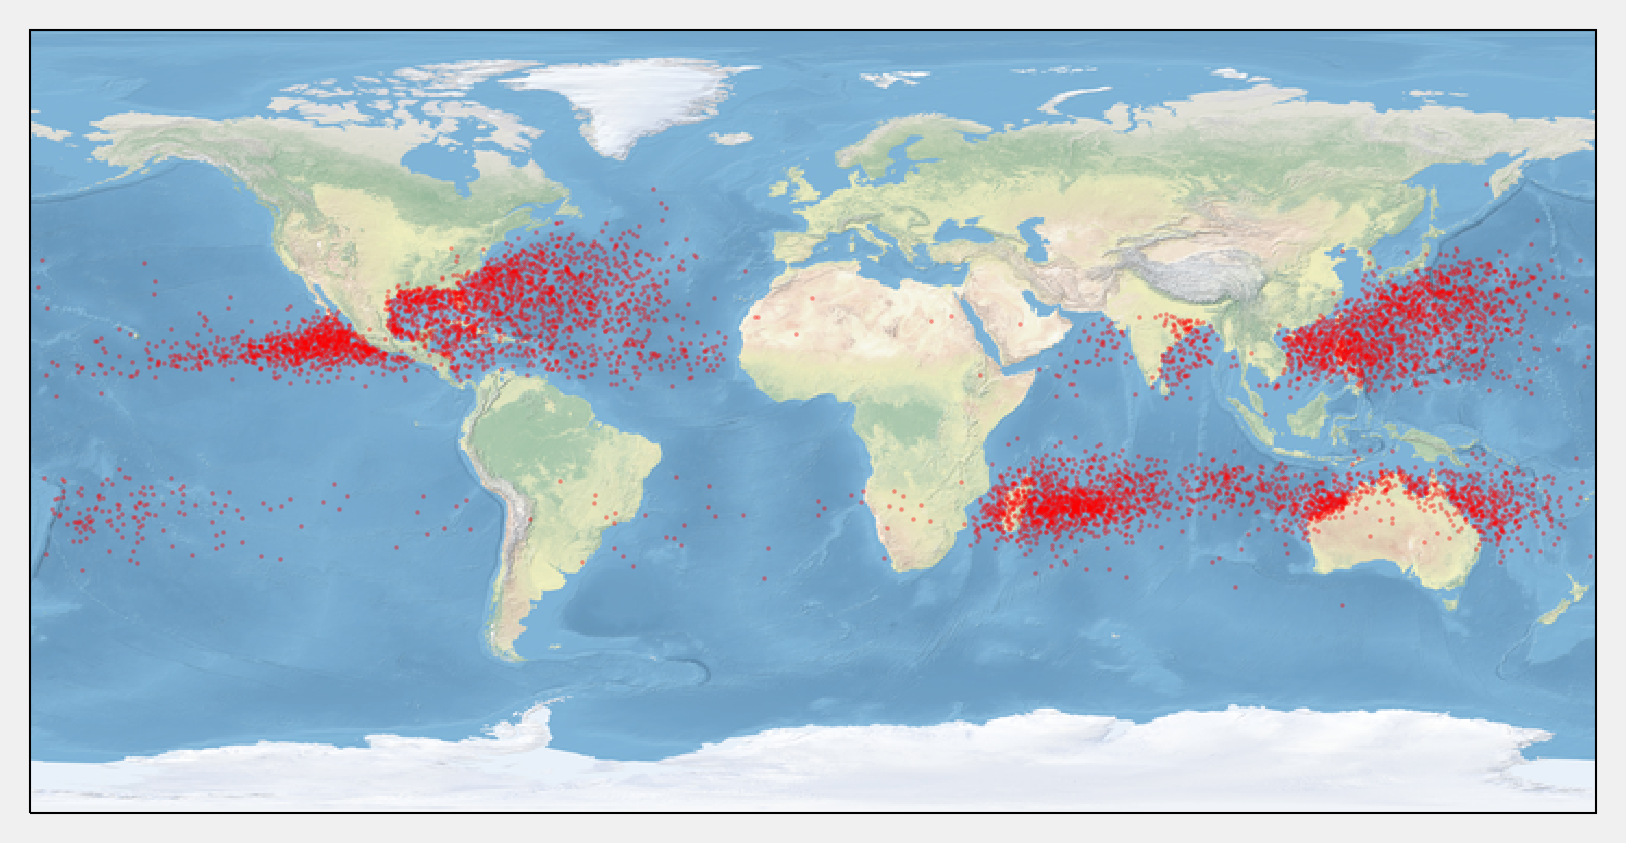

In [5]:
# We use a simple equirectangular projection,
# also called Plate Carree.
geo = ccrs.Geodetic()
crs = ccrs.PlateCarree()
# We create the map plot.
ax = plt.axes(projection=crs)
# We display the world map picture.
ax.stock_img()
# We display the storm locations.
ax.scatter(x, y, color='r', s=.5, alpha=.25, transform=geo)

In [6]:
h = crs.transform_points(geo, x, y)[:, :2].T
h.shape

(2, 6940)

In [7]:
kde = st.gaussian_kde(h)

In [8]:
k = 100
# Coordinates of the four corners of the map.
x0, x1, y0, y1 = ax.get_extent()
# We create the grid.
tx, ty = np.meshgrid(np.linspace(x0, x1, 2 * k),
                     np.linspace(y0, y1, k))
# We reshape the grid for the kde() function.
mesh = np.vstack((tx.ravel(), ty.ravel()))
# We evaluate the kde() function on the grid.
v = kde(mesh).reshape((k, 2 * k))

In [9]:
# https://stackoverflow.com/a/37334212/1595060
cmap = plt.get_cmap('Reds')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

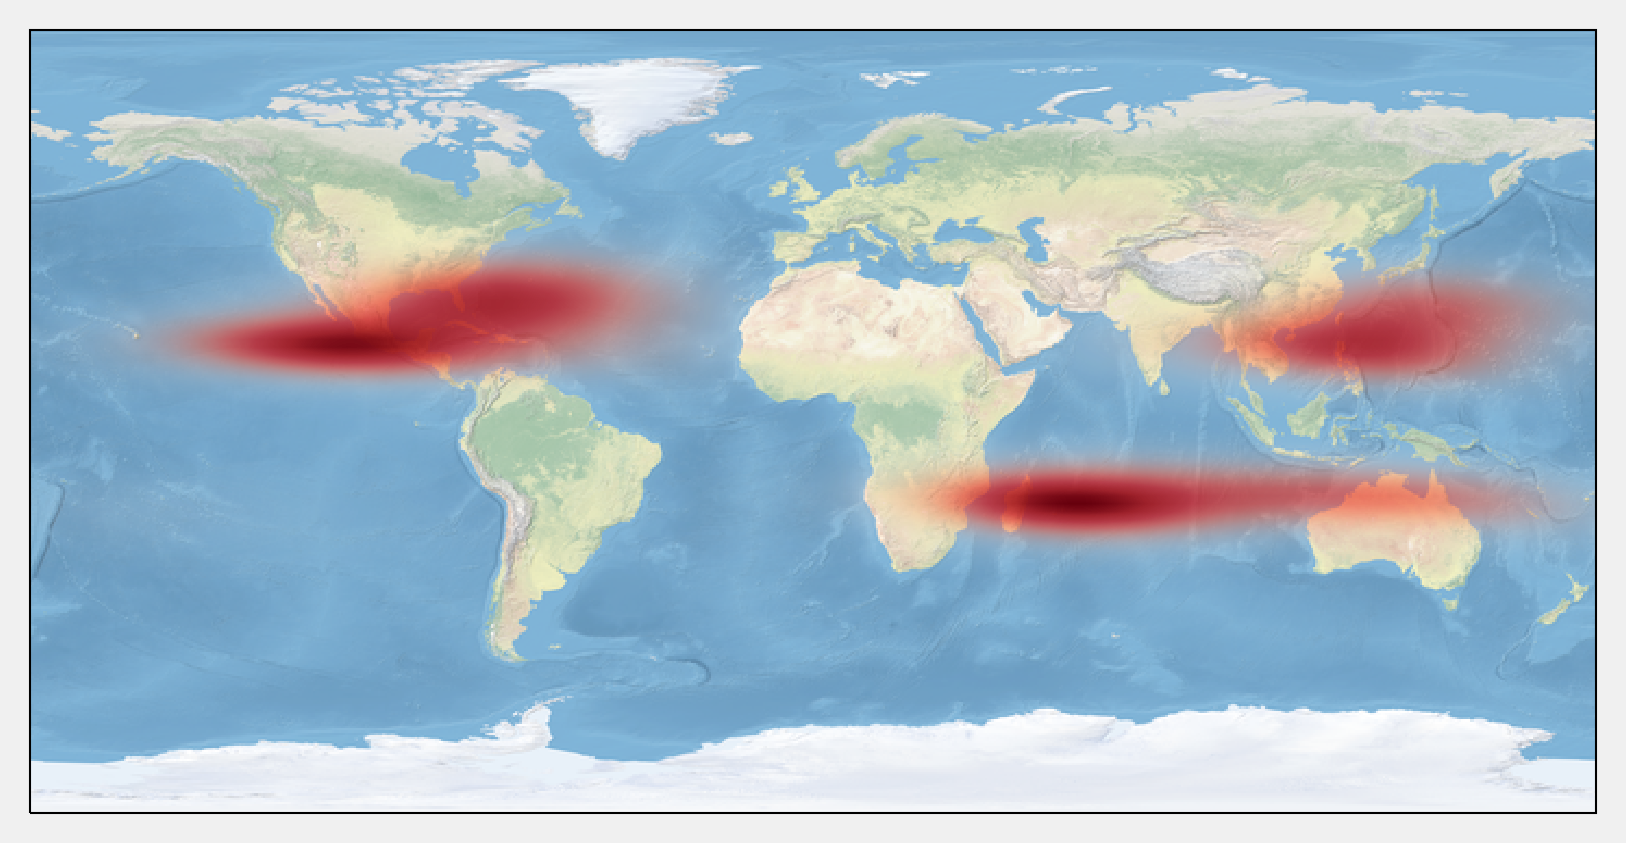

In [10]:
ax = plt.axes(projection=crs)
ax.stock_img()
ax.imshow(v, origin='lower',
          extent=[x0, x1, y0, y1],
          interpolation='bilinear',
          cmap=my_cmap)